# <span style="color:green"><center>Prueba Tecnica Porvenir </center></span>

Una entidad bancaria desea anticipar el volumen de transacciones por operación que ocurrirán en una ventana de tiempo de 10 días. Para llevar esta tarea a cabo se cuenta con la información de las operaciones realizadas en las diferentes terminales por un periodo de 4 meses.


El objetivo es utilizar estos datos para proporcionar a la entidad un entendimiento del comportamiento del volumen de transacciones por operación y por terminal, y generar recomendaciones que permitan soportar decisiones que optimicen la utilización de los terminales.

In [1]:
pip install pandasql

  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26782 sha256=e0882cd93eb31bb842e40783472aeb9dda9af7f11f197812ecb37009ba71333a
  Stored in directory: /root/.cache/pip/wheels/5c/4b/ec/41f4e116c8053c3654e2c2a47c62b4fca34cc67ef7b55deb7f
Successfully built pandasql


In [2]:
import pandas as pd
import pandasql as ps
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import seaborn as sns
plt.style.use('ggplot')

In [3]:
print("Versión de Tensorflow: ",tf.__version__,"\n")


Versión de Tensorflow:  2.5.0 



In [4]:
data = pd.read_csv("data_01.txt", delimiter = "\t")

**Variables que Tiene la base de Datos**

* **Fecha** :  Fecha y hora de la transacción.
* **IdTerminal**: Identificador de la terminal.
* **oper**:Tipo de operación realizada.


In [ ]:
data.columns

Index(['fecha', 'idTerminal', 'oper'], dtype='object')

In [ ]:
data.head(10)

,fecha,idTerminal,oper
0,2017-01-31 08:19:33.000,1828,0
1,2017-01-31 08:47:16.000,1828,1
2,2017-01-31 08:48:07.000,1828,1
3,2017-01-31 08:48:58.000,1828,1
4,2017-01-31 08:49:53.000,1828,1
5,2017-01-31 08:51:35.000,1593,0
6,2017-01-31 08:52:45.000,1593,1
7,2017-01-31 08:53:33.000,1593,1
8,2017-01-31 08:53:53.000,1746,0
9,2017-01-31 08:54:33.000,1593,1


In [ ]:
data.tail()

,fecha,idTerminal,oper
775461,2017-05-31 23:53:06.000,1980,7
775462,2017-05-31 23:54:46.000,1980,7
775463,2017-05-31 23:57:03.000,1964,4
775464,2017-05-31 23:58:15.000,1964,0
775465,2017-05-31 23:59:48.000,1882,0


**Conocer los tipos de variables que conforma la base y la dimensión de la misma**

In [ ]:
print(data.dtypes)
print()
print('Dimensión de la base :',data.shape)

fecha          object
idTerminal    float64
oper          float64
dtype: object

Dimensión de la base : (491111, 3)


**Determinar la cantidad de valores ausentes para cada variable**

In [101]:
data.isna().sum()

fecha         0
idTerminal    0
oper          0
dtype: int64

**Volumen de transacciones por Operaciones **

A continuación se Genera una tabla que muestre el volumen transaccional por operacion.

In [102]:
ope_vol=ps.sqldf("""select   oper as Operaciones, count(*) as Volumen_transacciones
                  from data
                  group by oper
                  order by Volumen_transacciones desc
                        """)

In [6]:
porcen=100 * data['oper'].value_counts() / len(data['oper'])
porcen=pd.DataFrame(porcen)
porcen= porcen.reset_index()
porcen.columns=['oper','trans']

In [103]:
ope_vol=ps.sqldf("""select   a.*, b.trans as Vol_tran_porce
                  from     ope_vol a 
                  left join porcen b
                  on a.Operaciones=b.oper                    
          """)


In [8]:
ope_vol.head()

,Operaciones,Volumen_transacciones,Vol_tran_porce
0,0,423929,54.667645
1,3,127399,16.428702
2,1,79195,10.212569
3,7,50662,6.533104
4,4,35817,4.618771


In [9]:
ope_vol.shape

(46, 3)

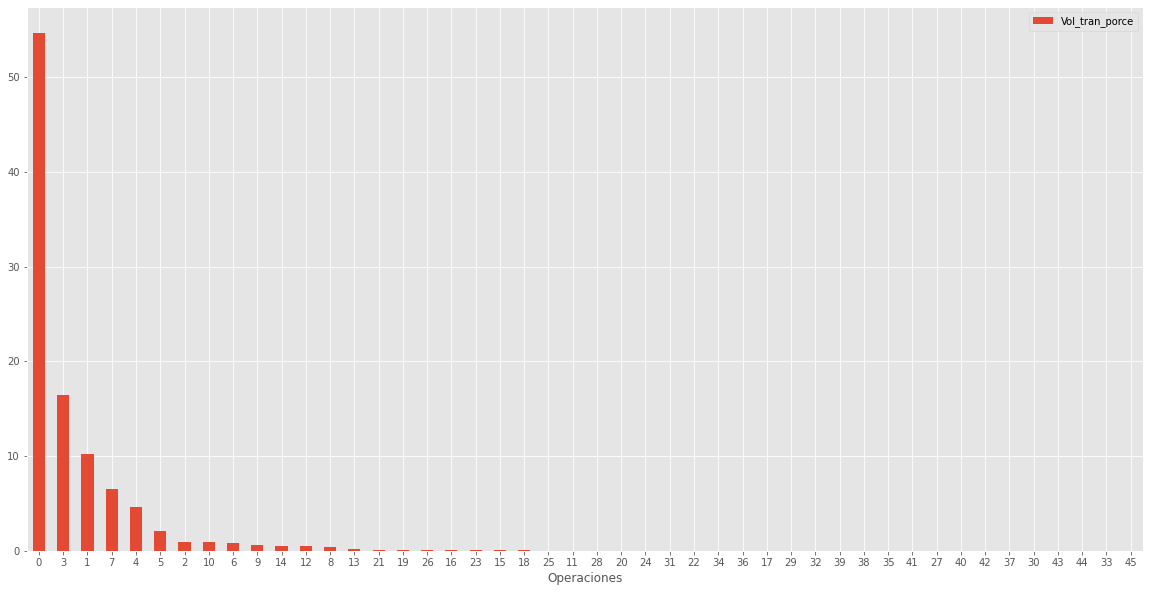

In [104]:
# Distribucion del volumen transaccional por operacion
ax = ope_vol.plot.bar(x='Operaciones', y='Vol_tran_porce', rot=0,figsize=(20,10))

Como se puede apreciar en la anterior grafica hay cinco operaciones que agrupan la gran mayoria de las transacciones, siendo la operación 0 la de mayor importancia con mas del 50%. 

**Volumen de transacciones por Terminal**

In [106]:
ter_vol=ps.sqldf("""select   idTerminal as Terminal, count(*) as Volumen_transacciones
            from     data
            group by idTerminal
            order by Volumen_transacciones desc
                        """)

In [ ]:
data.shape

(775466, 3)

In [107]:
porcen=100 * data['idTerminal'].value_counts() / len(data['idTerminal'])
porcen=pd.DataFrame(porcen)
porcen= porcen.reset_index()
porcen.columns=['idTerminal','trans']

In [108]:
ter_vol=ps.sqldf("""select   a.*, b.trans as Vol_tran_porce
                  from     ter_vol a 
                  left join porcen b
                  on a.Terminal=b.idTerminal                    
          """)

In [109]:
ter_vol.head()

,Terminal,Volumen_transacciones,Vol_tran_porce
0,1774,32122,4.142283
1,1908,30933,3.988956
2,1964,29999,3.868513
3,1910,26789,3.454568
4,1980,25243,3.255204


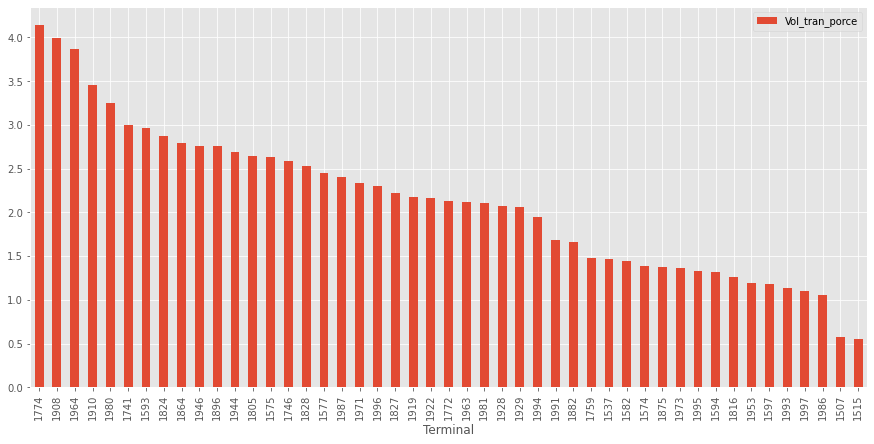

In [ ]:
# Distribucion del volumen transaccional por terminal
vt = ter_vol.plot.bar(x='Terminal', y='Vol_tran_porce',figsize=(15,7))

En el caso del volumen transaccional por terminal no se presenta un grupo especial de terminales que agrupen la mayoria de los movimientos, sin embargo se resalta que las terminales 1774,1908 y 1964 recogen el 10% de las mismas.

In [ ]:
ter_vol.shape

(47, 3)

In [ ]:
ter_vol.head()

,Terminal,Volumen_transacciones,Vol_tran_porce
0,1908.0,20942,4.264209
1,1964.0,20464,4.166879
2,1774.0,19911,4.054277
3,1963.0,16429,3.345272
4,1910.0,16395,3.338349


Como se quiere entender el volumen de transacciones por operación y por terminal, se genera la tabla Ter_ope que mira el volumen transaccional por operacion y terminal. 

In [11]:
Ter_ope=ps.sqldf("""select   idTerminal, oper as Operacion,count(*) as Volumen_transacciones
            from     data 
            group by idTerminal, oper
            order by Volumen_transacciones desc 
            """)

In [12]:
Ter_ope.head()

,idTerminal,Operacion,Volumen_transacciones
0,1774,0,17790
1,1910,0,16395
2,1908,0,15868
3,1964,0,15620
4,1577,0,13628


In [13]:
ps.sqldf("""select   distinct (Operacion), idTerminal , Volumen_transacciones
                 from     Ter_ope
                               """)

,Operacion,idTerminal,Volumen_transacciones
0,0,1774,17790
1,0,1910,16395
2,0,1908,15868
3,0,1964,15620
4,0,1577,13628
...,...,...,...
1291,17,1995,1
1292,27,1996,1
1293,40,1996,1
1294,43,1996,1


In [14]:
#Ter_ope['Operacion']!=0
a=(Ter_ope['Operacion']!=0) & (Ter_ope['idTerminal']!=1774)
b=(Ter_ope['Operacion']!=3) & (Ter_ope['idTerminal']!=1964)
c=(Ter_ope['Operacion']!=1) & (Ter_ope['idTerminal']!=1980)
d=(Ter_ope['Operacion']!=4) & (Ter_ope['idTerminal']!=1908)
Ter_ope[a & b & c & d]



,idTerminal,Operacion,Volumen_transacciones
77,1910,7,2279
80,1864,7,2154
105,1981,7,1794
107,1944,7,1766
108,1996,7,1762
...,...,...,...
1291,1995,17,1
1292,1996,27,1
1293,1996,40,1
1294,1996,43,1


In [16]:
##  Se determina el filtro 

filtro=[]
for i in range(len(data)):
  filtro.append(data['oper'][i] in b)

Con el fin de encontrar las operaciones y terminales que obtuvieron la mayor participacion en las transacciones, se obtiene el percentil 80 del volumen transaccional y se filtra por aquellas que presentaron un valor mayor a este.

In [17]:
#  Se determina el percentil 80 del volumen de las transacciones con el fin de obtener las operaciones
#  que presentaron mas volumen.

print(Ter_ope['Volumen_transacciones'].quantile(q=0.8)/len(data)*100)
print(Ter_ope['Volumen_transacciones'].quantile(q=0.80))

0.04203923834184864
326.0


In [18]:
# Se determina las terminales y operaciones que  presentaron un volumen mayor a 326.

a=Ter_ope[Ter_ope['Volumen_transacciones']>326].idTerminal.unique()
b=Ter_ope[Ter_ope['Volumen_transacciones']>326].Operacion.unique()


In [19]:
# Tabla de conteos doble entrada
# pd.crosstab(index=data['idTerminal'],columns=data['oper'], margins=True)

# Tabla de doble entrada pero en porcentaje
ab=pd.crosstab(index=data[filtro].idTerminal,columns=data[filtro].oper, margins=False).apply(lambda r: r/len(data)*100,axis=1)
type(ab)

pandas.core.frame.DataFrame

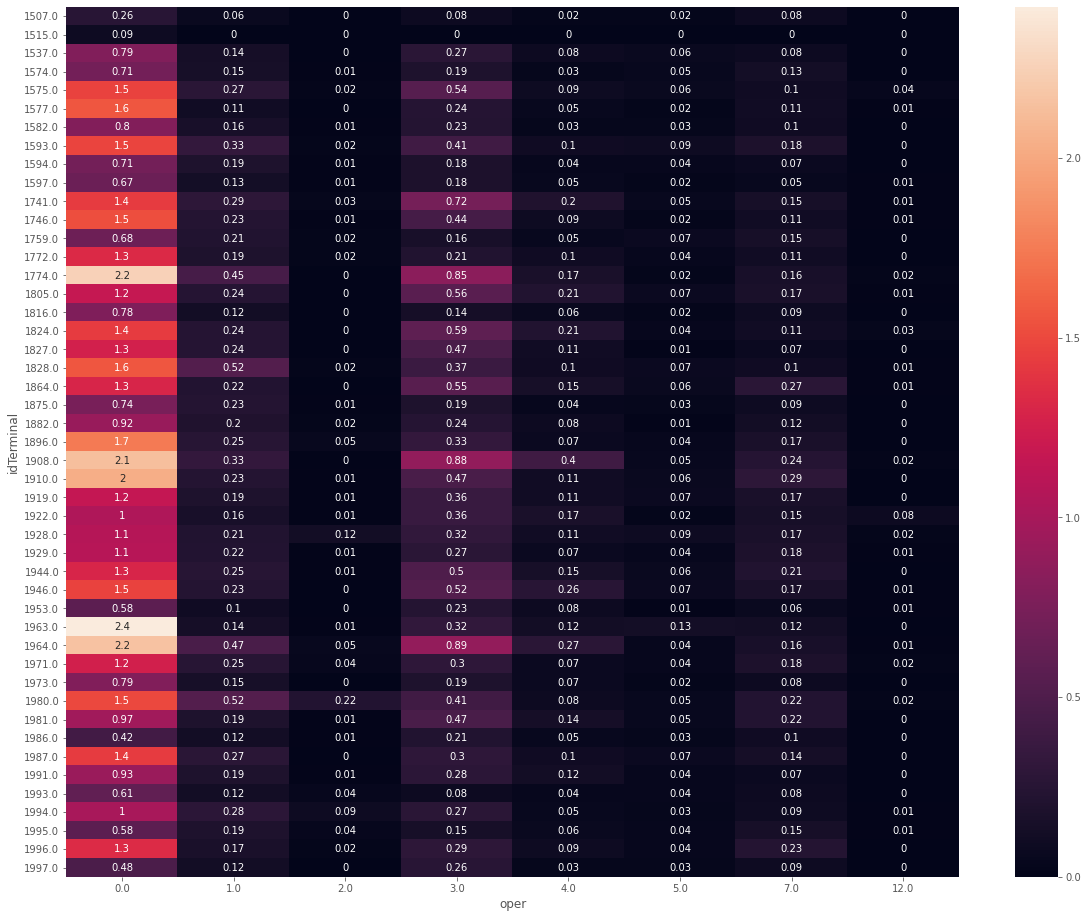

In [ ]:
# se representa el volumen transaccional por operacion y terminal.
plt.figure(figsize=(20,16))
sns.heatmap(round(ab,2), annot=True)

Con la anterior matriz se reconoce que terminales y operaciones agruparon la mayor cantidad de transacciones y aquellas combinaciones (terminal y operación) que no presentaron movimiento alguno.  

In [ ]:
Ter_ope.shape

(1296, 3)

**Selección de las 5 terminales y 5 operaciones que presentaron mayor volumen transaccional**

| Terminal | Operación |
|:--------:|:---------:|
|   1774   |     0     |
|   1964   |     3     |
|   1980   |     1     |
|   1908   |     4     |
|   1910   |     7     |

A continuación se generan las 5 bases que recogen el movimiento transaccional teniendo en cuenta las combinaciones de terminal y operacion señaladas anteriormente. 

In [20]:
prueba=ps.sqldf("""select   fecha,idTerminal,oper
            from     data 
            where idTerminal=1774 and oper=0
                  """)

In [21]:
prueba_2=ps.sqldf("""select   fecha,idTerminal,oper
            from     data 
            where idTerminal=1964 and oper=3
                  """)

In [22]:
prueba_3=ps.sqldf("""select   fecha,idTerminal,oper
            from     data 
            where idTerminal=1980 and oper=1
                  """)

In [23]:
prueba_4=ps.sqldf("""select   fecha,idTerminal,oper
            from     data 
            where idTerminal=1908 and oper=4
                  """)

In [24]:
prueba_5=ps.sqldf("""select   fecha,idTerminal,oper
            from     data 
            where idTerminal=1910 and oper=7
                  """)

In [ ]:
print(prueba.dtypes)

fecha         object
idTerminal     int64
oper           int64
dtype: object


In [ ]:
prueba.head()

,fecha,idTerminal,oper
0,2017-01-31 21:04:58.000,1774,0
1,2017-01-31 21:10:42.000,1774,0
2,2017-01-31 21:11:22.000,1774,0
3,2017-01-31 21:12:58.000,1774,0
4,2017-01-31 22:24:34.000,1774,0


**Representación grafica de las series**

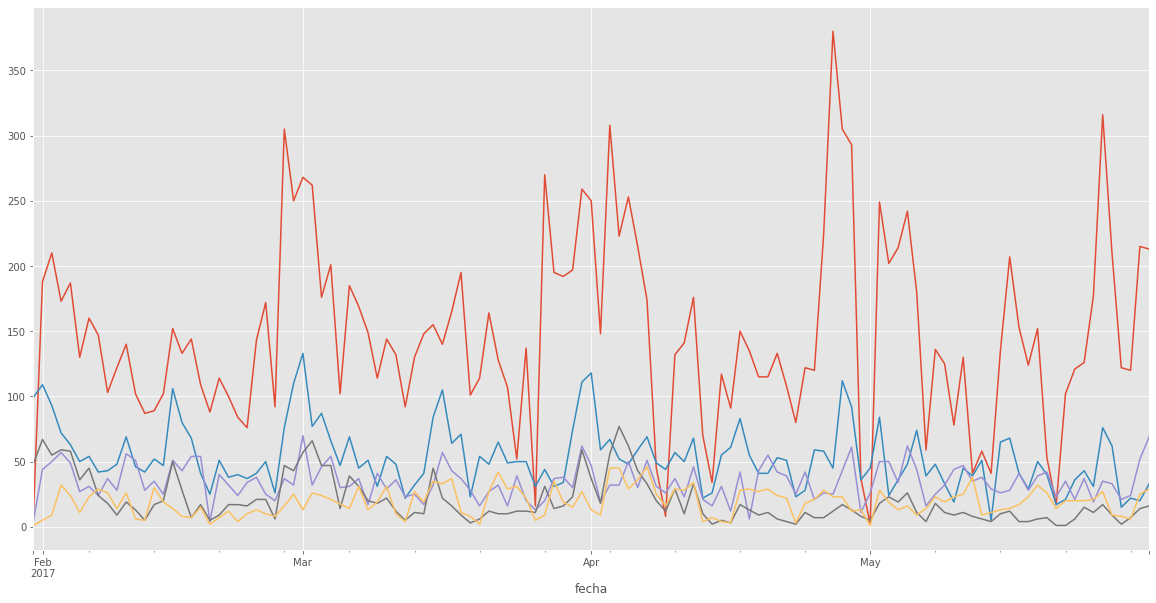

In [25]:
prueba['fecha'] = pd.to_datetime(prueba['fecha'])
monthly_orders = prueba.groupby(prueba['fecha'].dt.to_period('D')).size()
monthly_orders.plot.line(figsize=(20,10))

prueba_2['fecha'] = pd.to_datetime(prueba_2['fecha'])
monthly_orders = prueba_2.groupby(prueba_2['fecha'].dt.to_period('D')).size()
monthly_orders.plot.line(figsize=(20,10))

prueba_3['fecha'] = pd.to_datetime(prueba_3['fecha'])
monthly_orders = prueba_3.groupby(prueba_3['fecha'].dt.to_period('D')).size()
monthly_orders.plot.line(figsize=(20,10))

prueba_4['fecha'] = pd.to_datetime(prueba_4['fecha'])
monthly_orders = prueba_4.groupby(prueba_4['fecha'].dt.to_period('D')).size()
monthly_orders.plot.line(figsize=(20,10))

prueba_5['fecha'] = pd.to_datetime(prueba_5['fecha'])
monthly_orders = prueba_5.groupby(prueba_5['fecha'].dt.to_period('D')).size()
monthly_orders.plot.line(figsize=(20,10))

Se resalta que las 5 series presentan un comportamiento similar en cuanto a tendencia y a ciertos picos en el inicio de cada mes y a una caida sostenida luego que inicia el mes.

In [ ]:
prueba.shape

(17790, 3)

## Ajuste del modelo Arima  Serie #1





In [26]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from pylab import rcParams


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [27]:
prueba['fecha'] = pd.to_datetime(prueba['fecha'])
monthly_orders = prueba.groupby(prueba['fecha'].dt.to_period('D')).size()
d = { 'fecha': monthly_orders.index, 'Volum_tra':monthly_orders.values}
df = pd.DataFrame(data=d)

In [28]:
from datetime import datetime
#df['fecha'].map.(lambda x: x.strftime("%Y-%m-%d "))
a=map(lambda x: x.strftime("%Y-%m-%d "), df['fecha'])
df['fecha']=list(a)

### Visualización de la Serie

Text(0.5, 1.0, 'Terminal 1774 operacion 0')

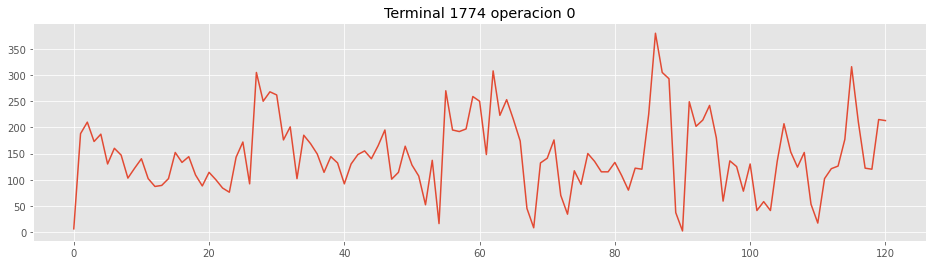

In [29]:
rcParams['figure.figsize'] = 16, 4
plt.plot(df['Volum_tra'])
plt.title('Terminal 1774 operacion 0')

Como se puede apreciar en la grafica la serie no presenta tendencia y tanto  la media y la varianza permanece constante a lo largo del tiempo.

Para justificar las anteriores afirmaciones se procede a realizar la prueba  de Dickey-Fuller.

In [30]:
result = adfuller(df['Volum_tra'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -6.810255980704882
p-value: 2.1252135997147925e-09
Critical Values:
	1%: -3.486055829282407
	5%: -2.8859430324074076
	10%: -2.5797850694444446


Se obtiene un p-valor cercano a cero, asi que se rechaza la hipotesis nula. obteniendo que los datos son estacionarios y no se hace necesario diferenciar la serie. 

### ACF y PACF 

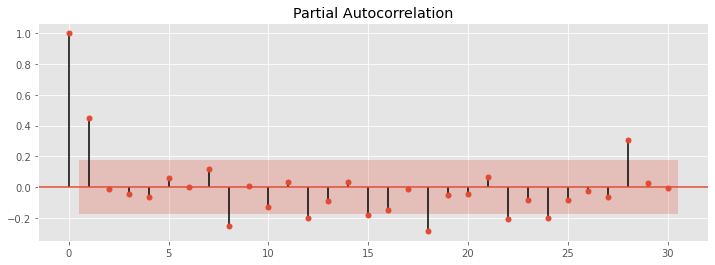

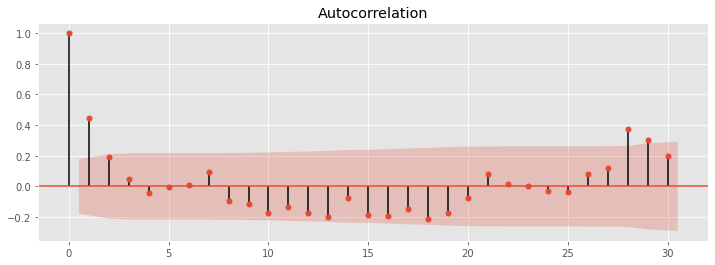

In [31]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
rcParams['figure.figsize'] = 12, 4
plot_pacf(df['Volum_tra'],lags=30)
plot_acf(df['Volum_tra'],lags=30)
plt.show()

Observando la función de autocorrelación se puede apreciar que el primer rezago es significativo y que no hay estacionalidad.

Con la función de autocorrelación parcial se aprecian rezagos significativos en $h=1, h=8, h=12$ y $h=18$.

Asi, los posibles valores para un modelo $ARMA(p,q)$ son $p=1,2$ y $q= 1,8,12$ y $18$

### Ajustando el modelo 

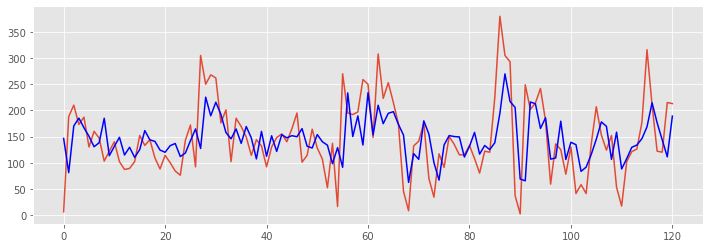

In [32]:
model_1 = ARIMA(df['Volum_tra'], order=(8,0,1))
model_fit_1 = model_1.fit()
plt.plot(df['Volum_tra'])
plt.plot(model_fit_1.fittedvalues, color='blue')

In [ ]:
print(model_fit.summary())


                              ARMA Model Results                              
Dep. Variable:              Volum_tra   No. Observations:                  121
Model:                     ARMA(8, 1)   Log Likelihood                -668.778
Method:                       css-mle   S.D. of innovations             60.583
Date:                Tue, 20 Jul 2021   AIC                           1359.555
Time:                        04:33:11   BIC                           1390.309
Sample:                             0   HQIC                          1372.045
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             146.4123      9.553     15.326      0.000     127.688     165.136
ar.L1.Volum_tra     0.0643      0.468      0.137      0.891      -0.853       0.982
ar.L2.Volum_tra     0.2000      

In [ ]:
print(sum((df['Volum_tra']-model_fit.fittedvalues)**2))

451365.3867950319


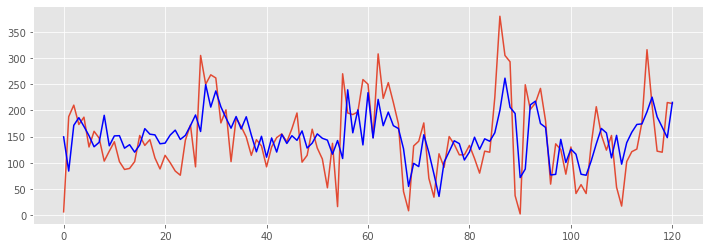

In [39]:
model_2 = ARIMA(df['Volum_tra'], order=(8,0,2))
model_fit_2 = model_2.fit()
plt.plot(df['Volum_tra'])
plt.plot(model_fit_2.fittedvalues, color='blue')

In [40]:
np.mean((df['Volum_tra']-model_fit_2.fittedvalues)**2)

#print(sum((df['Volum_tra']-model_fit_2.fittedvalues)**2))

3429.330041441213

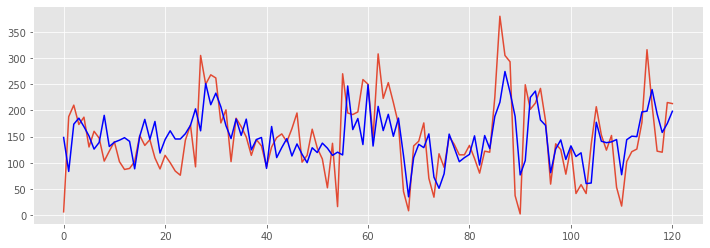

In [33]:
model_3 = ARIMA(df['Volum_tra'], order=(18,0,2))
model_fit_3 = model_3.fit()
plt.plot(df['Volum_tra'])
plt.plot(model_fit_3.fittedvalues, color='blue')

In [37]:
np.mean((df['Volum_tra']-model_fit_3.fittedvalues)**2)

# print(mean((df['Volum_tra']-model_fit_3.fittedvalues)**2))

3126.1755925576585

Teniendo en cuenta el error cuadratico medio de los anteriores modelos, se elige el modelo 3 para realizar el pronostico a 10 dias.

In [42]:
# Realizar el pronostico a 10 dias
forecast = model_fit_3.forecast(steps=10)[0]

In [46]:
 prono=forecast.astype(int)

In [47]:
import pandas as pd
from datetime import datetime

fechas = pd.date_range(start="2017-06-01",end="2017-06-10")
d = {'fecha': fechas, 'Volumen_Transacciones': prono}
df = pd.DataFrame(data=d)
df
#future = pd.DataFrame(fechas,prono)
#future

,fecha,Volumen_Transacciones
0,2017-06-01,222
1,2017-06-02,254
2,2017-06-03,160
3,2017-06-04,128
4,2017-06-05,146
5,2017-06-06,177
6,2017-06-07,143
7,2017-06-08,150
8,2017-06-09,166
9,2017-06-10,138


## Ajustando el modelo serie #2

In [52]:
prueba_2['fecha'] = pd.to_datetime(prueba_2['fecha'])
monthly_orders = prueba_2.groupby(prueba_2['fecha'].dt.to_period('D')).size()
d = { 'fecha': monthly_orders.index, 'Volum_tra':monthly_orders.values}
df = pd.DataFrame(data=d)

In [53]:
from datetime import datetime
#df['fecha'].map.(lambda x: x.strftime("%Y-%m-%d "))
a=map(lambda x: x.strftime("%Y-%m-%d "), df['fecha'])
df['fecha']=list(a)

### Representación grafica de la serie

Text(0.5, 1.0, 'Terminal 1964 operacion 3')

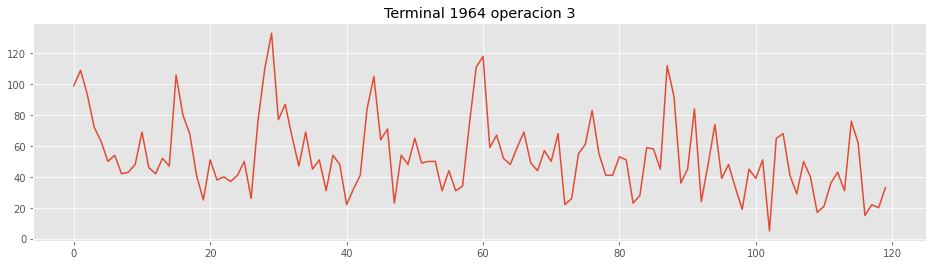

In [60]:
rcParams['figure.figsize'] = 16, 4
plt.plot(df['Volum_tra'])
plt.title('Terminal 1964 operacion 3')

**Prueba de Dickey-Fuller.**

In [56]:
result = adfuller(df['Volum_tra'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -6.677128035896693
p-value: 4.436109145085408e-09
Critical Values:
	1%: -3.4865346059036564
	5%: -2.8861509858476264
	10%: -2.579896092790057


### ACF y PACF

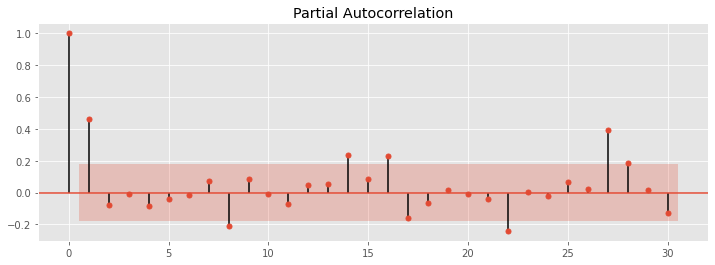

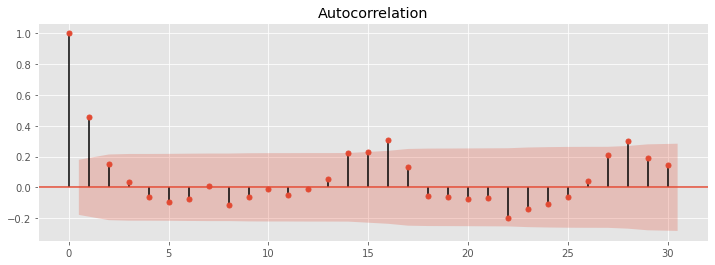

In [55]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
rcParams['figure.figsize'] = 12, 4
plot_pacf(df['Volum_tra'],lags=30)
plot_acf(df['Volum_tra'],lags=30)
plt.show()

Observando la función de autocorrelación se puede apreciar que el primer rezago es significativo y que se presenta una  estacionalidad.

Con la función de autocorrelación parcial se aprecian rezagos significativos en  h=1,h=8,h=14  y  h=16 .

Asi, los posibles valores para un modelo  ARMA(p,q)  son  p=1  y  q=1,8  y  14

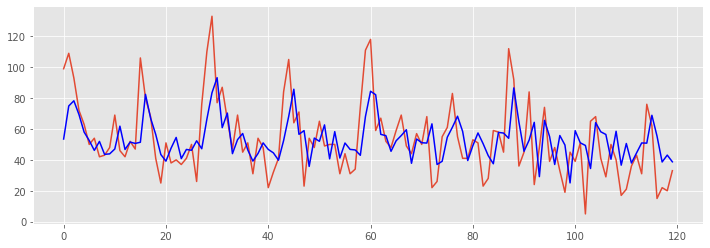

In [81]:
model_2_1 = ARIMA(df['Volum_tra'], order=(8,0,1))
model_fit_2_1 = model_2_1.fit()
plt.plot(df['Volum_tra'])
plt.plot(model_fit_2_1.fittedvalues, color='blue')

In [82]:
np.mean((df['Volum_tra']-model_fit_2_1.fittedvalues)**2)


429.8344554657939

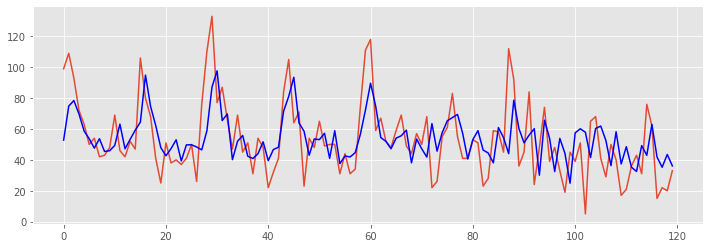

In [83]:
model_2_2 = ARIMA(df['Volum_tra'], order=(14,0,1))
model_fit_2_2 = model_2_2.fit()
plt.plot(df['Volum_tra'])
plt.plot(model_fit_2_2.fittedvalues, color='blue')

In [84]:
np.mean((df['Volum_tra']-model_fit_2_2.fittedvalues)**2)

397.3353519886314

In [87]:
# Realizar el pronostico a 10 dias
forecast = model_fit_2_2.forecast(steps=10)[0]
prono=forecast.astype(int)

In [89]:
import pandas as pd
from datetime import datetime

fechas = pd.date_range(start="2017-06-01",end="2017-06-10")
d = {'fecha': fechas, 'Volumen_Transacciones': prono}
df = pd.DataFrame(data=d)
df
#future = pd.DataFrame(fechas,prono)
#future

,fecha,Volumen_Transacciones
0,2017-06-01,38
1,2017-06-02,54
2,2017-06-03,49
3,2017-06-04,38
4,2017-06-05,44
5,2017-06-06,39
6,2017-06-07,42
7,2017-06-08,41
8,2017-06-09,50
9,2017-06-10,55


## Ajustando el modelo serie #3

In [90]:
prueba_3['fecha'] = pd.to_datetime(prueba_3['fecha'])
monthly_orders = prueba_3.groupby(prueba_3['fecha'].dt.to_period('D')).size()
d = { 'fecha': monthly_orders.index, 'Volum_tra':monthly_orders.values}
df = pd.DataFrame(data=d)

In [91]:
from datetime import datetime
#df['fecha'].map.(lambda x: x.strftime("%Y-%m-%d "))
a=map(lambda x: x.strftime("%Y-%m-%d "), df['fecha'])
df['fecha']=list(a)

### Representación Grafica

Text(0.5, 1.0, 'Terminal 1980 operacion 1')

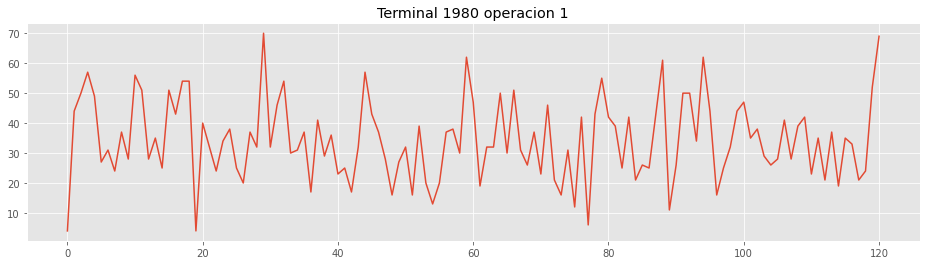

In [93]:
rcParams['figure.figsize'] = 16, 4
plt.plot(df['Volum_tra'])
plt.title('Terminal 1980 operacion 1')

**Prueba de Dickey-Fuller**

In [94]:
result = adfuller(df['Volum_tra'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -3.3347087612063744
p-value: 0.01339650821884629
Critical Values:
	1%: -3.49181775886872
	5%: -2.8884437992971588
	10%: -2.5811201893779985


### ACF y PACF

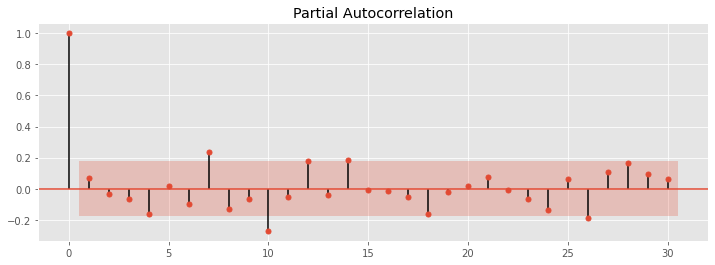

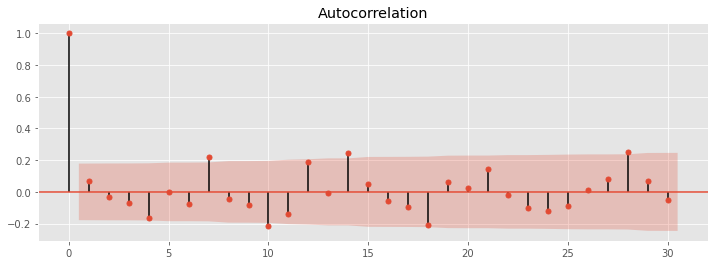

In [95]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
rcParams['figure.figsize'] = 12, 4
plot_pacf(df['Volum_tra'],lags=30)
plot_acf(df['Volum_tra'],lags=30)
plt.show()

Observando la función de autocorrelación se puede apreciar que los rezagos 7 y 10 son significativos y que se presenta una estacionalidad.

Con la función de autocorrelación parcial se aprecian rezagos significativos en $h=7$ y $h=10$

Asi, los posibles valores para un modelo $ARMA(p,q)$ son $p=7,10$ y $q=7$ y $10$

### Modelo

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


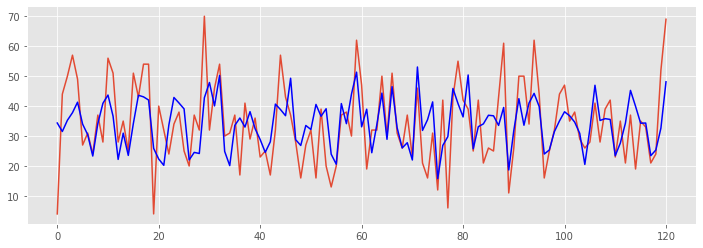

In [97]:
model_3_1 = ARIMA(df['Volum_tra'], order=(10,0,7))
model_fit_3_1 = model_3_1.fit()
plt.plot(df['Volum_tra'])
plt.plot(model_fit_3_1.fittedvalues, color='blue')

In [98]:
np.mean((df['Volum_tra']-model_fit_3_1.fittedvalues)**2)

123.74624162365924

In [99]:
# Realizar el pronostico a 10 dias
forecast = model_fit_3_1.forecast(steps=10)[0]
prono=forecast.astype(int)

In [100]:
import pandas as pd
from datetime import datetime

fechas = pd.date_range(start="2017-06-01",end="2017-06-10")
d = {'fecha': fechas, 'Volumen_Transacciones': prono}
df = pd.DataFrame(data=d)
df
#future = pd.DataFrame(fechas,prono)
#future

,fecha,Volumen_Transacciones
0,2017-06-01,45
1,2017-06-02,44
2,2017-06-03,42
3,2017-06-04,28
4,2017-06-05,22
5,2017-06-06,26
6,2017-06-07,38
7,2017-06-08,36
8,2017-06-09,30
9,2017-06-10,32
